In [11]:
# a bunch of random data visualizations with a pokemon dataset to help learn seaborn & plotly
# github doesn't seem to render all the plotly charts unfortunately :C

import seaborn as sns 
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.express as px 
from plotly import graph_objects as go

%matplotlib inline

In [12]:
# encoding=unicode_escape to avoid utf-8 error while reading in the csv

pokemon_df = pd.read_csv("Pokemon.csv", index_col=0, encoding="unicode_escape")

In [13]:
pokemon_df.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False


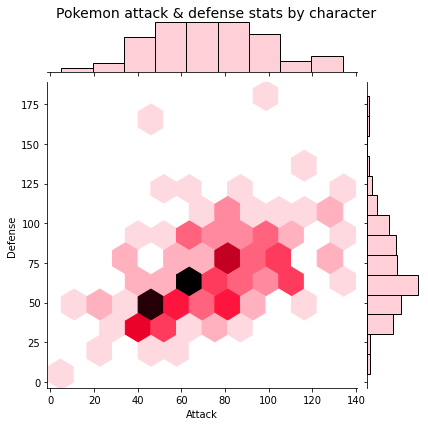

In [14]:
plot = sns.jointplot(x="Attack", y="Defense", kind="hex", color="pink", data=pokemon_df)

plot.fig.suptitle("Pokemon attack & defense stats by character", fontsize=14)
plot.fig.subplots_adjust(top=0.95)

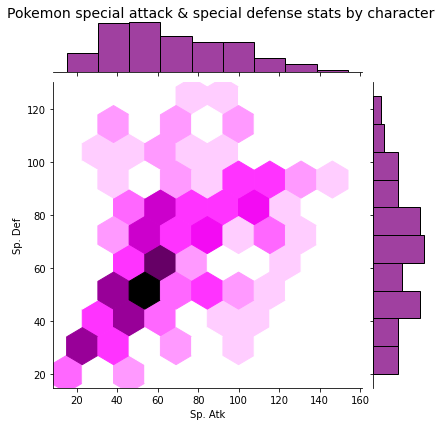

In [15]:
plot = sns.jointplot(x="Sp. Atk", y="Sp. Def", kind="hex", color="purple", data=pokemon_df)

plot.fig.suptitle("Pokemon special attack & special defense stats by character", fontsize=14)

plot.fig.subplots_adjust(top=0.95)

In [16]:
# get count by type, convert to dataframe & reset index so columns can be renamed 
type_1_counts = pokemon_df["Type 1"].value_counts()
type_df = pd.DataFrame(type_1_counts)
type_df = type_df.reset_index()
type_df.columns = ['type', 'counts']

type_df


fig = px.bar(type_df, x="type", y="counts", color="type", 
             text_auto=True, title= "Count of Pokemon characters by type")

fig.layout.update(showlegend=False) 

fig.show()

In [17]:
fig = px.density_heatmap(pokemon_df, x="Total", y="HP", title="Total vs HP")
fig.show()

In [18]:
fig = px.density_heatmap(pokemon_df, x="Total", y="HP", marginal_x="histogram", marginal_y="histogram",
                        title="Total vs HP w/ marginal histogram")

fig.show()

In [10]:
# sort so they are presented that way in the viz 

pokemon_df_sorted = pokemon_df.sort_values(by=["Total"], ascending=False)

fig = px.bar(pokemon_df_sorted, x="Name", y="Total", color="Name", 
             text_auto=True, title= "Count of Pokemon characters by total points",
             width=1500)

fig.layout.update(showlegend=False) 

fig.show()